In [1]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #04 - Chaos

Purpose:
In this lab we are creating a simulation taht is based off two differing intial conditions that will test to see how sensitive a model is the intial contions. Each run of the model is based of the previous
model's output meaning that we will need it to be a function of time and we will use the same functions for each run but the previous run's output will be used to make the successive run. This is why in our functions
there is a time variable that appears. We will run the model for 120 days using a 4 hour time stamp equalling to 720 runs. The run is done for the x, y,z and z. Then the output of each is plotted to see how 
different the output is using two differing inital conditons. The only condition that readily changes is the x component. 
[PUT MORE INFORMATION HERE - I.E., WHAT SPECIFIC THING IS BEING DONE]

"""
__author__    = "Talia Kurtz"
__contact__   = "talia.kurtz@und.edu"

In [38]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles

In [6]:
#Defining the Constants
a = 0.25
b = 4.0
F = 8.0
G = 1.0
delta_time = (4/(5*24))

In [69]:
#Defining Equations
def time_step_eqn(x, y, z):
    dx_dt = (-(y**2) - (z**2) - (a*x) + (a*F))
    time_step_x = x + (delta_time*(dx_dt))
    
    dy_dt = ((x*y)- (b*x*z) - y + G)
    time_step_y = y + (delta_time*(dy_dt))

    dz_dt = ((b*x*y) + (x*z) - z)
    time_step_z = z + (delta_time*(dz_dt))
    
    return([time_step_x, time_step_y, time_step_z])   #returning the values as a list

In [76]:
#Making an empty list of 720 for x , y, and z
first_conditions_x = np.empty([720])
first_conditions_y = np.empty([720])
first_conditions_z = np.empty([720])
#We are now setting the first values in each list to the first set of intial conditions
first_conditions_x[0] = 2.5
first_conditions_y[0] = 1.0
first_conditions_z[0] = 0.0


#start at 1, increment time step every 1 until 720
for i in range(1, 720):
    run = time_step_eqn(first_conditions_x[i-1], first_conditions_y[i-1], first_conditions_z[i-1]) #we are subtracting from i because we want the previous runs intial conditions
    first_conditions_x[i] = run[0]   #we are now filling in the empty lists we made above with the output from our function
    first_conditions_y[i] = run[1]
    first_conditions_z[i] = run[2]

In [80]:
#Making an empty list of 720 for x , y, and z
second_conditions_x = np.empty([720])
second_conditions_y = np.empty([720])
second_conditions_z = np.empty([720])
#We are now setting the first values in each list to the first set of intial conditions
second_conditions_x[0] = 2.49
second_conditions_y[0] = 1.0
second_conditions_z[0] = 0.0


#start at 1, increment time step every 1 until 720
for i in range(1, 720):
    run_2 = time_step_eqn(second_conditions_x[i-1], second_conditions_y[i-1], second_conditions_z[i-1]) #we are subtracting from i because we want the previous runs intial conditions
    second_conditions_x[i] = run_2[0]   #we are now filling in the empty lists we made above with the output from our function
    second_conditions_y[i] = run_2[1]
    second_conditions_z[i] = run_2[2]

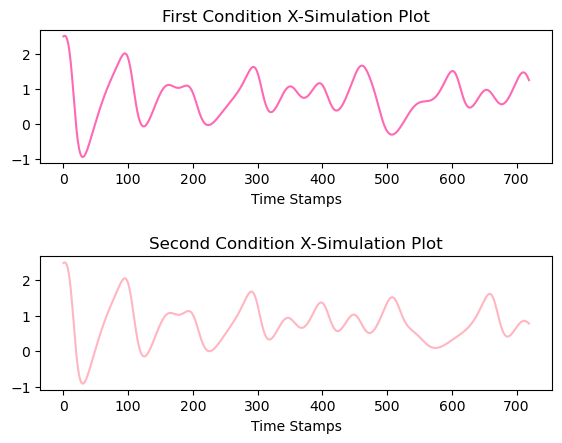

In [131]:
fig, axs = plt.subplots(2)
fig.tight_layout()

plt.subplots_adjust(left=0.1, bottom=0.1,right=0.9, top=0.85,wspace=0.9,hspace=0.7)
axs[0].plot(first_conditions_x[:], color='hotpink')
axs[0].set_title('First Condition X-Simulation Plot')
axs[0].set_xlabel('Time Stamps')
axs[1].plot(second_conditions_x[:], color='lightpink')
axs[1].set_title('Second Condition X-Simulation Plot')
axs[1].set_xlabel('Time Stamps')

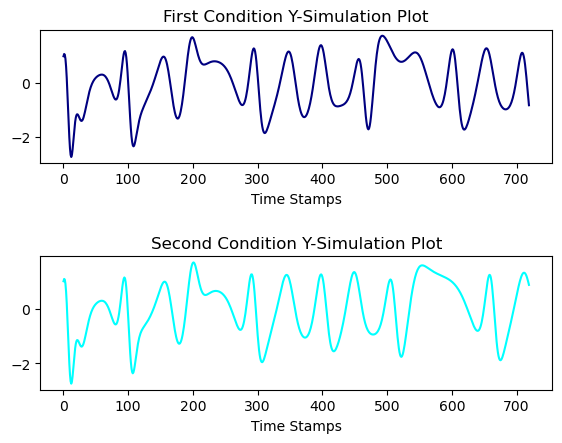

In [130]:
fig, axs = plt.subplots(2)
fig.tight_layout()

plt.subplots_adjust(left=0.1, bottom=0.1,right=0.9, top=0.85,wspace=0.9,hspace=0.7)
axs[0].plot(first_conditions_y[:], color='navy')
axs[0].set_title('First Condition Y-Simulation Plot')
axs[0].set_xlabel('Time Stamps')
axs[1].plot(second_conditions_y[:], color='aqua')
axs[1].set_title('Second Condition Y-Simulation Plot')
axs[1].set_xlabel('Time Stamps')

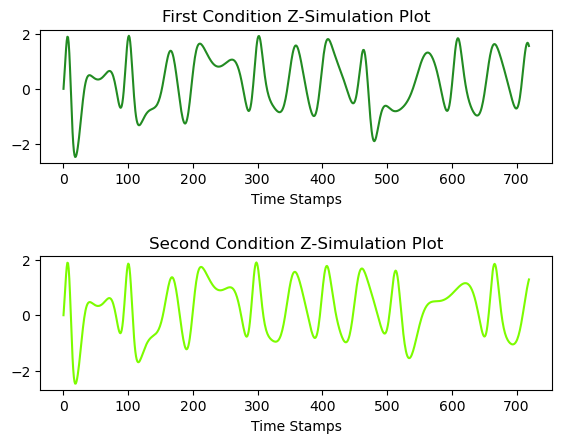

In [129]:
fig, axs = plt.subplots(2)
fig.tight_layout()

plt.subplots_adjust(left=0.1, bottom=0.1,right=0.9, top=0.85,wspace=0.9,hspace=0.7)
axs[0].plot(first_conditions_z[:], color='forestgreen')
axs[0].set_title('First Condition Z-Simulation Plot')
axs[0].set_xlabel('Time Stamps')
axs[1].plot(second_conditions_z[:], color='lawngreen')
axs[1].set_title('Second Condition Z-Simulation Plot')
axs[1].set_xlabel('Time Stamps')

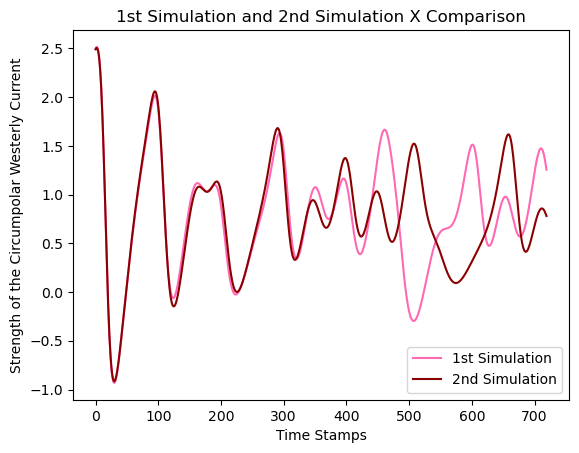

In [151]:
#Stacking the x runs 
fig1 = plt.plot(first_conditions_x[:], color = 'hotpink', label = '1st Simulation')
fig2 = plt.plot(second_conditions_x[:], color = 'darkred', label = '2nd Simulation')
plt.xlabel('Time Stamps')
plt.ylabel('Strength of the Circumpolar Westerly Current')
plt.legend(loc = 'lower right')
plt.title('1st Simulation and 2nd Simulation X Comparison')
plt.savefig('C://Users/research/thesis_code/ATSC_528_09192022/ATSC528_2022-main/04-Chaos/first_second_conditions_x_simulations.png')

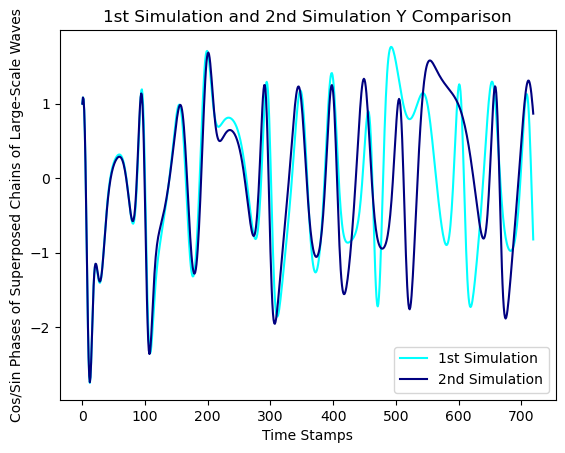

In [149]:
#Stacking the y runs 
fig1 = plt.plot(first_conditions_y[:], color = 'aqua', label = '1st Simulation')
fig2 = plt.plot(second_conditions_y[:], color = 'navy', label = '2nd Simulation')
plt.xlabel('Time Stamps')
plt.ylabel('Cos/Sin Phases of Superposed Chains of Large-Scale Waves')
plt.legend(loc = 'lower right')
plt.title('1st Simulation and 2nd Simulation Y Comparison')
plt.savefig('C://Users/research/thesis_code/ATSC_528_09192022/ATSC528_2022-main/04-Chaos/first_second_conditions_y_simulations.png')

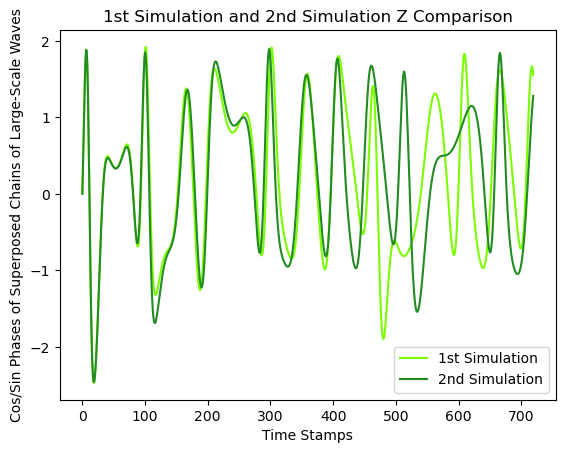

In [150]:
#Stacking the x runs 
fig1 = plt.plot(first_conditions_z[:], color = 'lawngreen', label = '1st Simulation')
fig2 = plt.plot(second_conditions_z[:], color = 'forestgreen', label = '2nd Simulation')
plt.xlabel('Time Stamps')
plt.ylabel('Cos/Sin Phases of Superposed Chains of Large-Scale Waves')
plt.legend(loc = 'lower right')
plt.title('1st Simulation and 2nd Simulation Z Comparison')
plt.savefig('C://Users/research/thesis_code/ATSC_528_09192022/ATSC528_2022-main/04-Chaos/first_second_conditions_z_simulations.png')

In [ ]:
'''' 
In a separte text file (or below), provide a discussion of your results
 Make sure to answer the following questions in your discussion          
 1 - Are the two simulations the same throughout the entire period?     
     If not, when do they diverge?   
The two simulations are not the same throughout the entire period. Slight deviations can be observed starting at the 100 time stamp mainly for the z and x simualtions; however, it can be observed for the 
y simulation as well it just isn't as obvious. All simualtions begin to heavily diverge at the 450 on point. In the x simulation comparison between the ~520 to 600 time stamps the lines are out of phase.
The simulation runs for x,y, and z all end at a different point. The z simulations diverges a lot between 550 and 650. In the y simulation between 200 and 300 time stamps the amplitudes are not the same between the
simulations.In conclusion, no the simulations are not identical and diverge heavily the more runs you do.


### 2 - If the ending points are different, what does this say regarding    ###
###     the importance of providing NWP models, assuming this serves as a   ###
###     proxy for one, with accurate and balanced initial conditions?       ###
Weather is a dymanic system that is complicated to replicate. To predict the weather accurately you need to ensure that your initial conditions are as close to the actual atmospheric conditions as possible
if they are not they preceding simulations may be close to begin with; however, as time goes on they will deviate more and more. Each run builds off the previous run meaning that if the initial conditions are
not accurate for the first run the error will continue on and on throughout the remaining runs and only grow more and more. This can also be related to chaos theory. The strength of the circumpolar westerly current 
is not a random state. There is a pattern that exisits with it.
'''